In [18]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipykernel_27117/1365488764.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [19]:
print("First 5 records:", df.head())

First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
#القيم الفريدة لكل عمود
print("\nUnique values for each column:\n")
for col in df.columns:
    if col != 'customerID':
        print(f"{col}: {df[col].unique()}\n")


Unique values for each column:

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges: [

In [22]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Senior', 0: 'Genior'})

In [23]:
# Initialize counters
dropped_rows_phoneservice = 0
dropped_rows_internetservice = 0

# For PhoneService and MultipleLines
mask_phone = (df['PhoneService'] == 'No') & (df['MultipleLines'] != 'No phone service')
dropped_rows_phoneservice = mask_phone.sum()
df = df[~mask_phone]

# For InternetService and related columns
internet_related_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
mask_internet = (df['InternetService'] == 'No')
for col in internet_related_cols:
    mask = mask_internet & (df[col] != 'No internet service')
    dropped_rows_internetservice += mask.sum()
    df = df[~mask]

print(f"Dropped rows due to PhoneService inconsistency: {dropped_rows_phoneservice}")
print(f"Dropped rows due to InternetService inconsistency: {dropped_rows_internetservice}")

Dropped rows due to PhoneService inconsistency: 0
Dropped rows due to InternetService inconsistency: 0


In [24]:
import pandas as pd
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())

11


In [25]:
df = df.dropna(subset=['TotalCharges'])

In [26]:
from sklearn.preprocessing import LabelEncoder

# إنشاء نسخة من البيانات الأصلية
df_clean = df.copy()

# ترميز المتغيرات النوعية
le = LabelEncoder()
for column in df_clean.columns:
    if df_clean[column].dtype == 'object' and column != 'customerID':
        df_clean[column] = le.fit_transform(df_clean[column])


In [27]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  
 17  

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (2), which may not be intended.
  ax = sns.barplot(


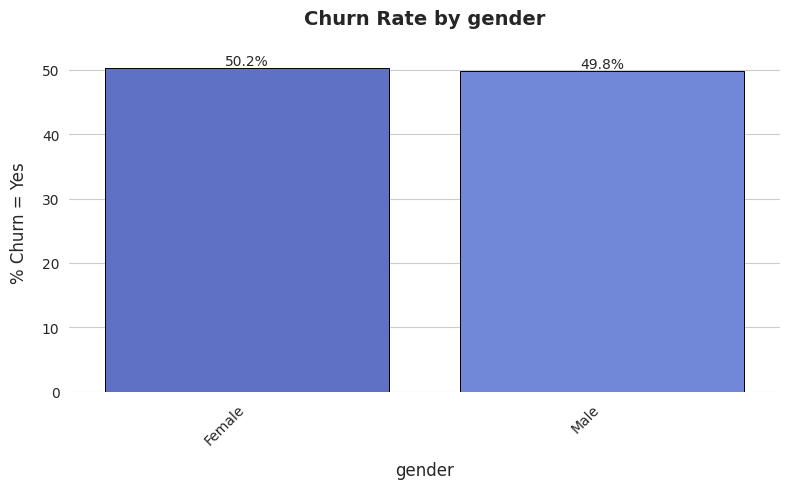

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (2), which may not be intended.
  ax = sns.barplot(


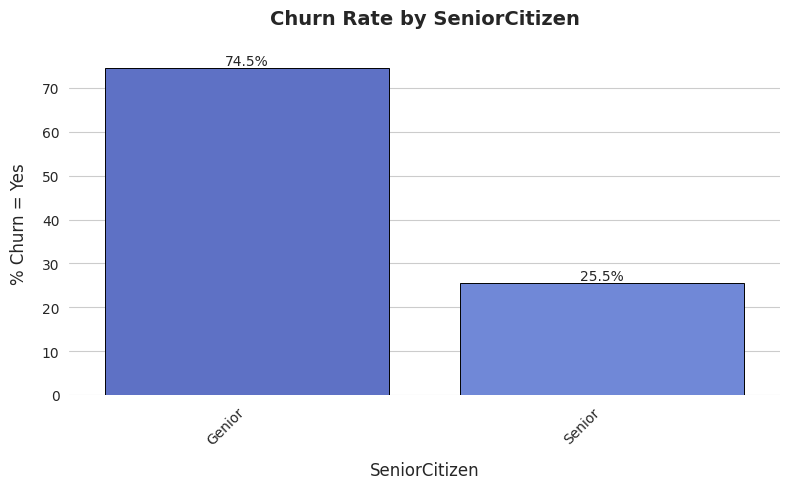

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (2), which may not be intended.
  ax = sns.barplot(


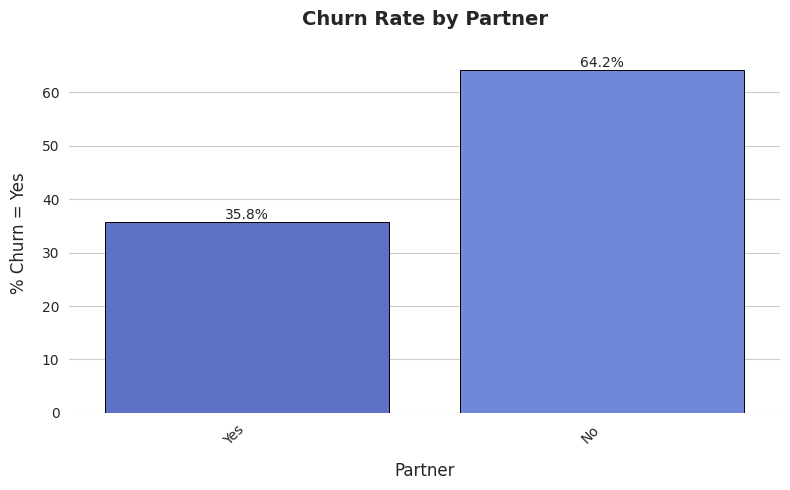

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (2), which may not be intended.
  ax = sns.barplot(


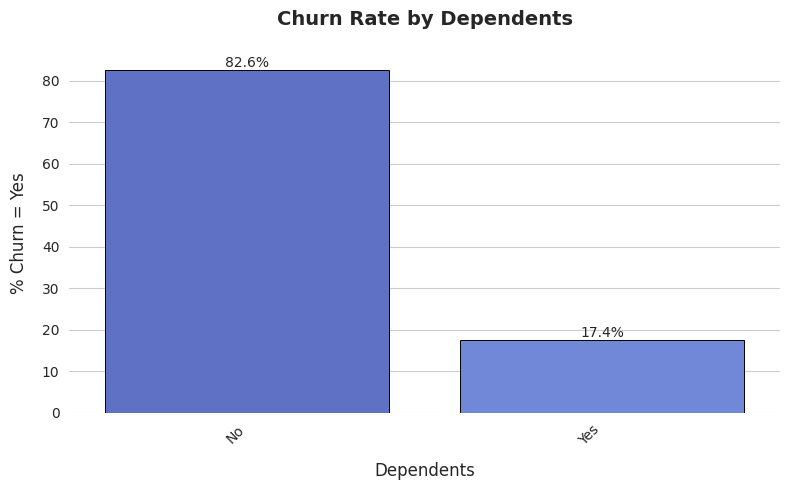

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (2), which may not be intended.
  ax = sns.barplot(


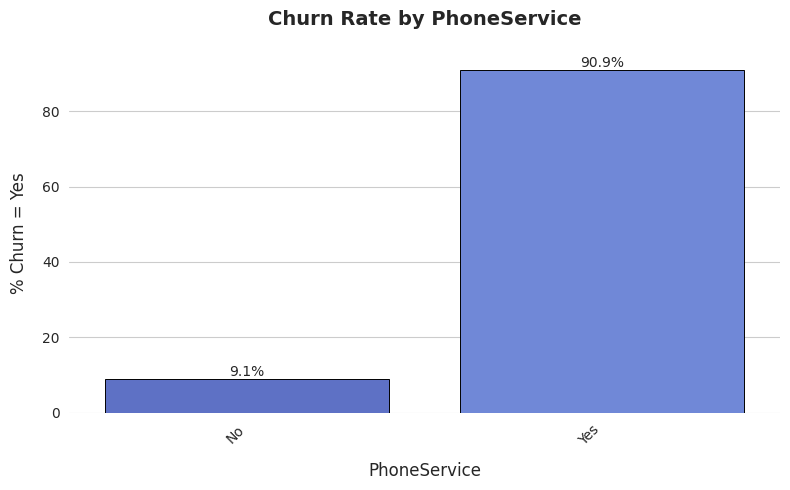

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (3), which may not be intended.
  ax = sns.barplot(


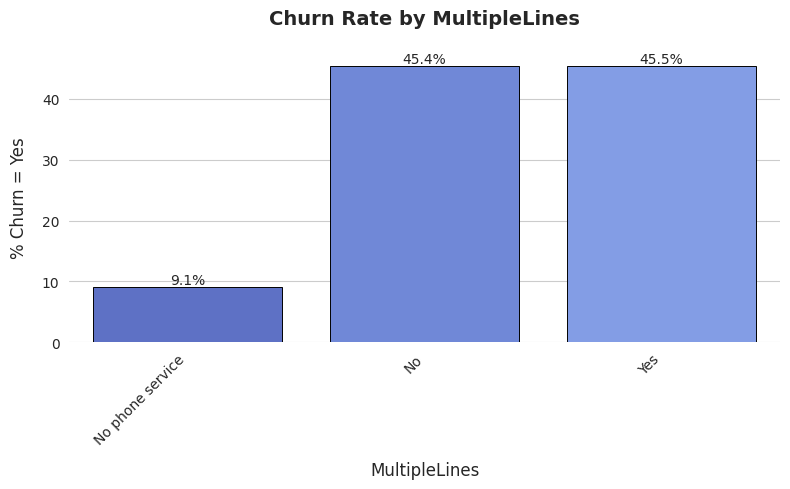

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (3), which may not be intended.
  ax = sns.barplot(


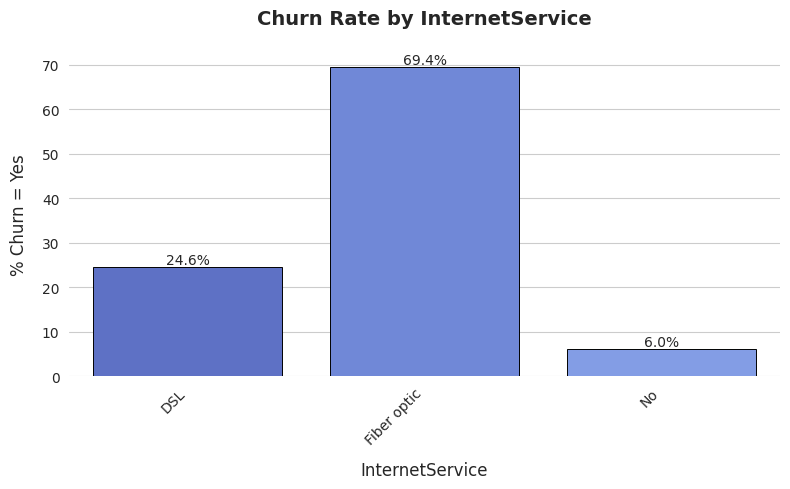

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (3), which may not be intended.
  ax = sns.barplot(


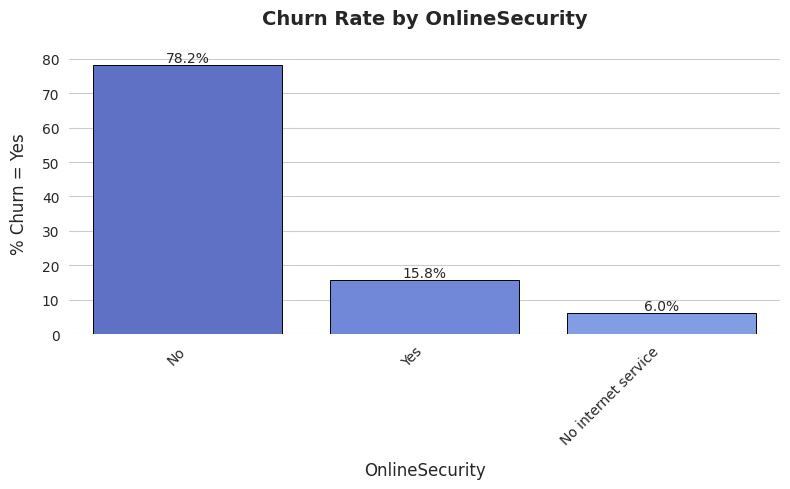

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (3), which may not be intended.
  ax = sns.barplot(


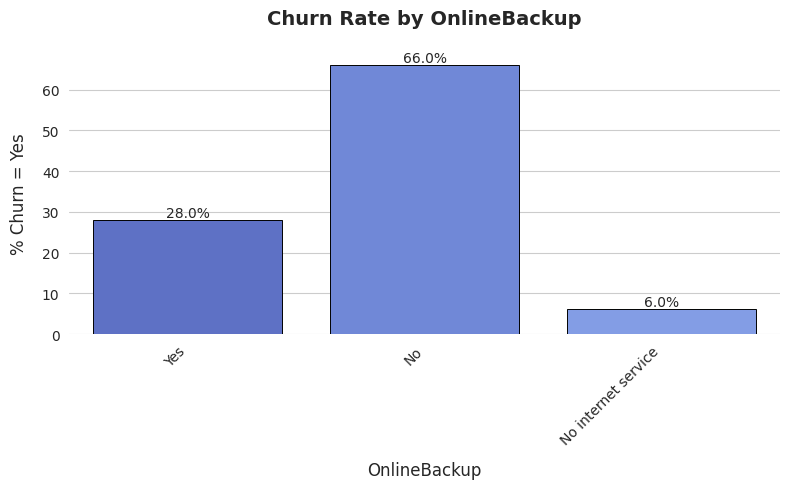

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (3), which may not be intended.
  ax = sns.barplot(


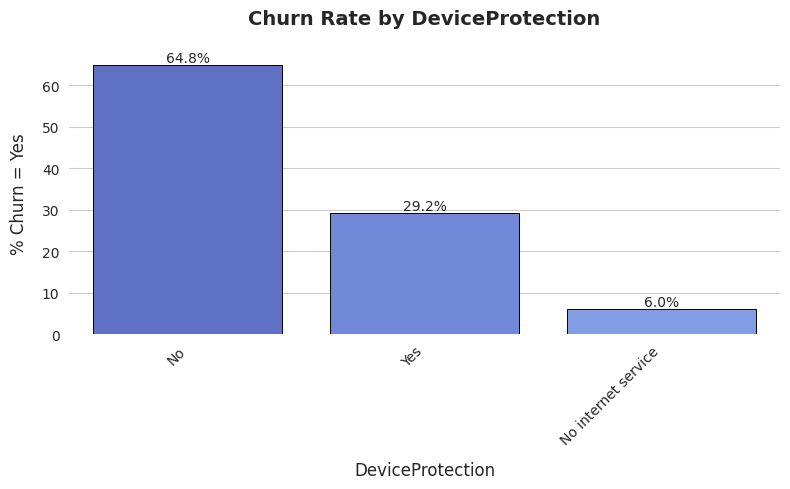

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (3), which may not be intended.
  ax = sns.barplot(


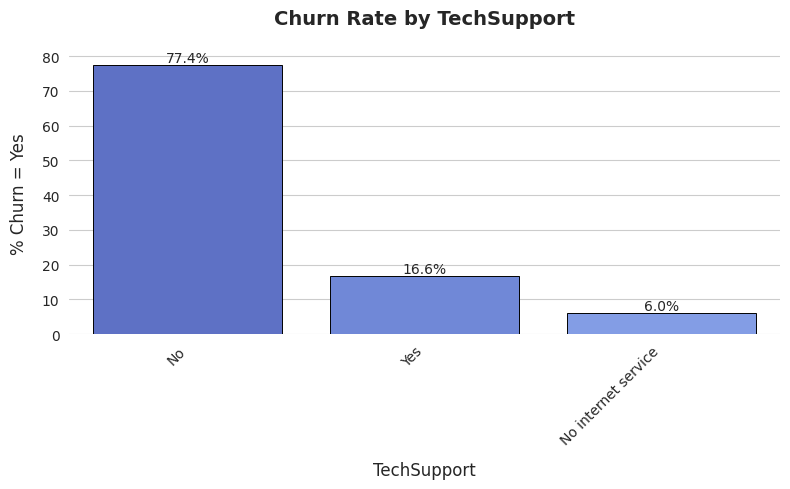

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (3), which may not be intended.
  ax = sns.barplot(


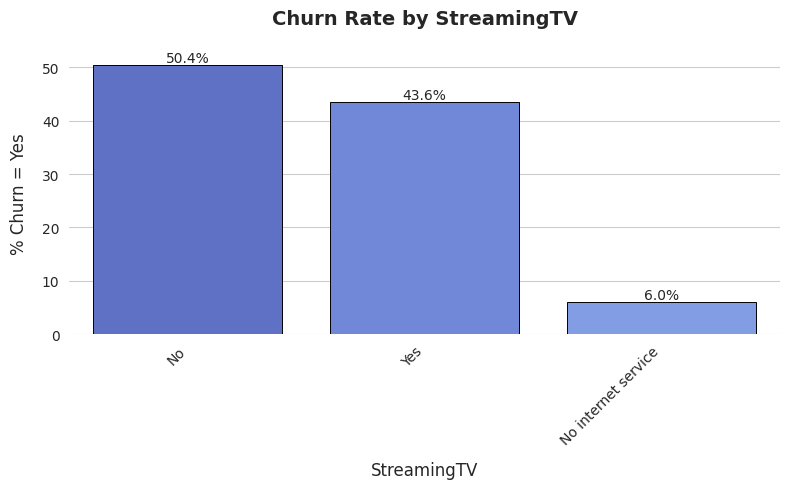

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (3), which may not be intended.
  ax = sns.barplot(


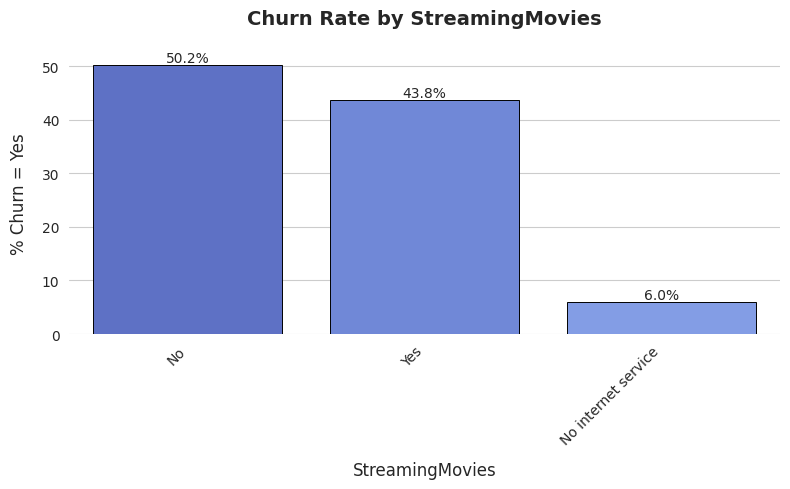

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (3), which may not be intended.
  ax = sns.barplot(


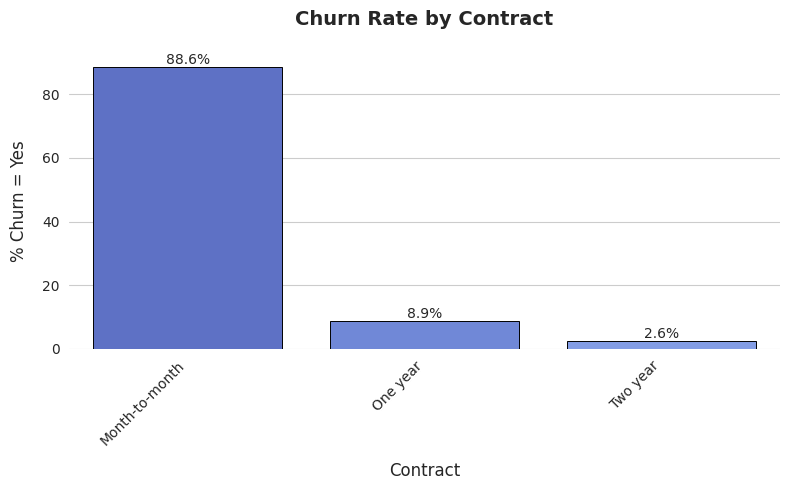

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (2), which may not be intended.
  ax = sns.barplot(


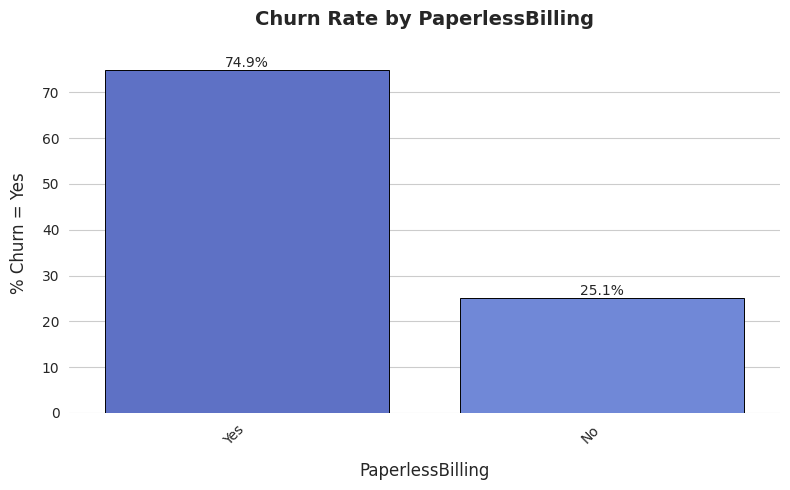

/tmp/ipykernel_27117/2919751975.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_27117/2919751975.py:25: UserWarning: The palette list has more values (16) than needed (4), which may not be intended.
  ax = sns.barplot(


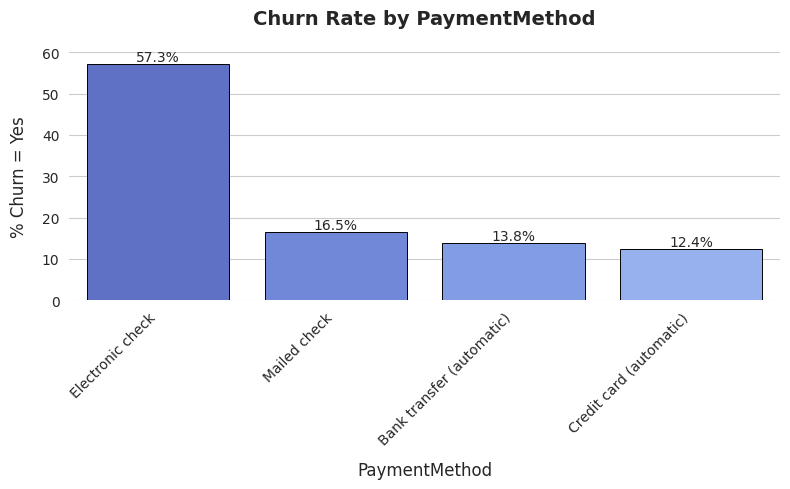

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set global style
sns.set_style("whitegrid")  # Background grid
plt.rcParams['font.family'] = 'DejaVu Sans'  # Clean font

cat_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']


# Define a color palette (e.g., 'coolwarm', 'viridis', or custom)
PALETTE = sns.color_palette("coolwarm", len(cat_vars))

for var in cat_vars:
    # Calculate % Churn = 'Yes' per category
    percent_yes = df[df['Churn'] == 'Yes'][var].value_counts(normalize=True) * 100
    percent_yes = percent_yes.reindex(df[var].unique(), fill_value=0)  # Preserve order

    # Create figure
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        x=percent_yes.index, 
        y=percent_yes.values, 
        palette=PALETTE,  # Apply color palette
        edgecolor="black",  # Black borders on bars
        linewidth=0.7
    )
    
    # Customize title/labels
    plt.title(
        f'Churn Rate by {var}', 
        fontsize=14, 
        fontweight='bold', 
        pad=20
    )
    plt.xlabel(var, fontsize=12, labelpad=10)
    plt.ylabel('% Churn = Yes', fontsize=12, labelpad=10)
    
    # Rotate x-labels and adjust alignment
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add value annotations on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.1f}%', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            xytext=(0, 5), 
            textcoords='offset points',
            fontsize=10
        )
    
    # Remove spines (optional)
    sns.despine(left=True, bottom=True)
    
    # Tight layout and show
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_27117/2981988490.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


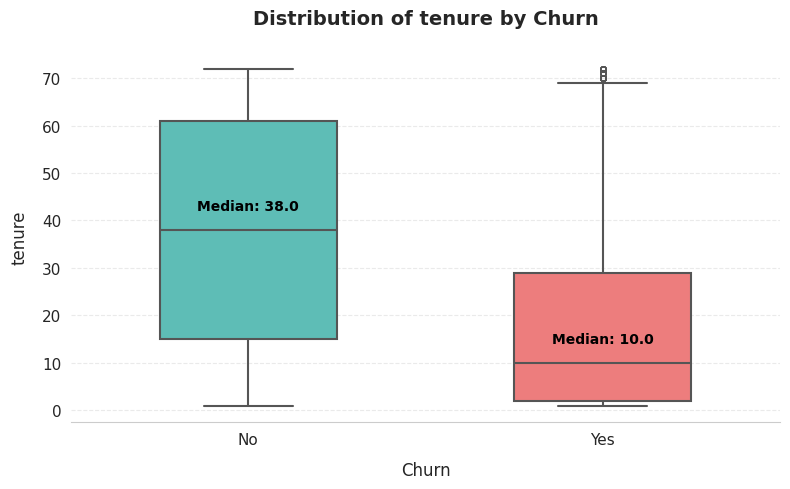

/tmp/ipykernel_27117/2981988490.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


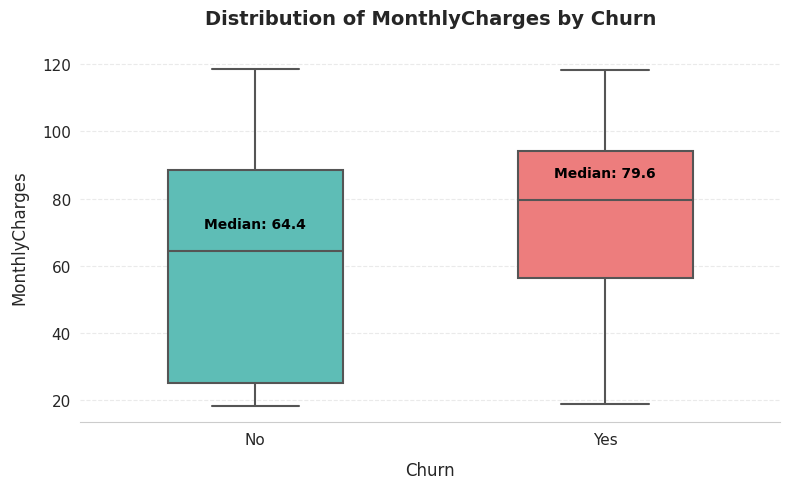

/tmp/ipykernel_27117/2981988490.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


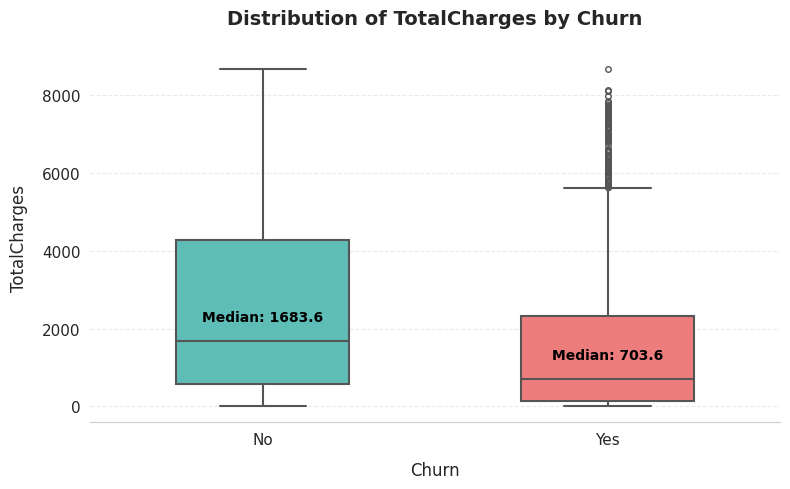

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set global style
sns.set_style("whitegrid")  # Clean background with grid
plt.rcParams['font.family'] = 'DejaVu Sans'  # Professional font

# Custom color palette for 'Churn' (Yes/No)
PALETTE = {"Yes": "#FF6B6B", "No": "#4ECDC4"}  # Red (Churn) vs Teal (No Churn)

num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

for var in num_vars:
    plt.figure(figsize=(8, 5))
    ax = sns.boxplot(
        x='Churn', 
        y=var, 
        data=df, 
        palette=PALETTE,  # Custom colors
        width=0.5,       # Adjust box width
        linewidth=1.5,   # Thicker borders
        fliersize=4      # Outlier marker size
    )
    
    # Titles and labels
    plt.title(
        f'Distribution of {var} by Churn', 
        fontsize=14, 
        fontweight='bold', 
        pad=20
    )
    plt.xlabel('Churn', fontsize=12, labelpad=10)
    plt.ylabel(var, fontsize=12, labelpad=10)
    
    # Customize ticks and grid
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.4)  # Horizontal grid lines
    
    # Add median annotations
    medians = df.groupby('Churn')[var].median().round(1)
    for i, (churn, median) in enumerate(medians.items()):
        ax.text(
            i, median + 0.05 * df[var].max(),  # Position slightly above median
            f'Median: {median}', 
            ha='center', 
            va='bottom',
            fontsize=10,
            color='black',
            weight='bold'
        )
    
    sns.despine(left=True)  # Remove left spine for cleaner look
    plt.tight_layout()
    plt.show()

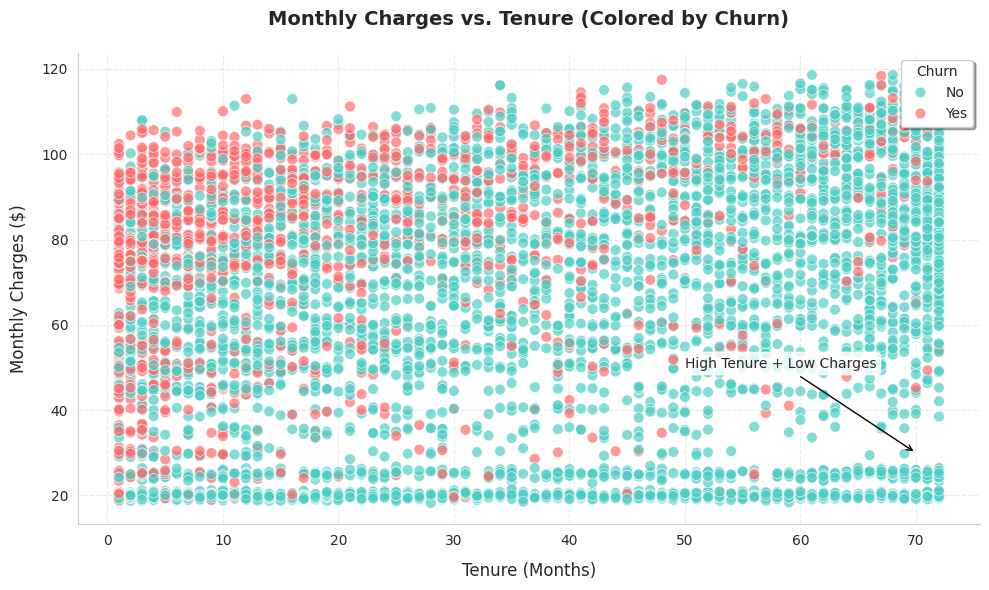

In [30]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='tenure', 
    y='MonthlyCharges', 
    hue='Churn', 
    data=df, 
    palette=PALETTE,  # Same palette as above
    alpha=0.7,       # Transparency for overlapping points
    s=60             # Point size
)

# Titles and labels
plt.title(
    'Monthly Charges vs. Tenure (Colored by Churn)', 
    fontsize=14, 
    fontweight='bold', 
    pad=20
)
plt.xlabel('Tenure (Months)', fontsize=12, labelpad=10)
plt.ylabel('Monthly Charges ($)', fontsize=12, labelpad=10)

# Legend and grid
plt.legend(
    title='Churn', 
    loc='upper right', 
    frameon=True, 
    shadow=True
)
plt.grid(linestyle='--', alpha=0.4)

# Annotate clusters (optional)
plt.annotate(
    'High Tenure + Low Charges', 
    xy=(70, 30), 
    xytext=(50, 50),
    arrowprops=dict(arrowstyle='->', color='black'),
    fontsize=10,
    bbox=dict(boxstyle='round', fc='white', alpha=0.8)
)

sns.despine()
plt.tight_layout()
plt.show()

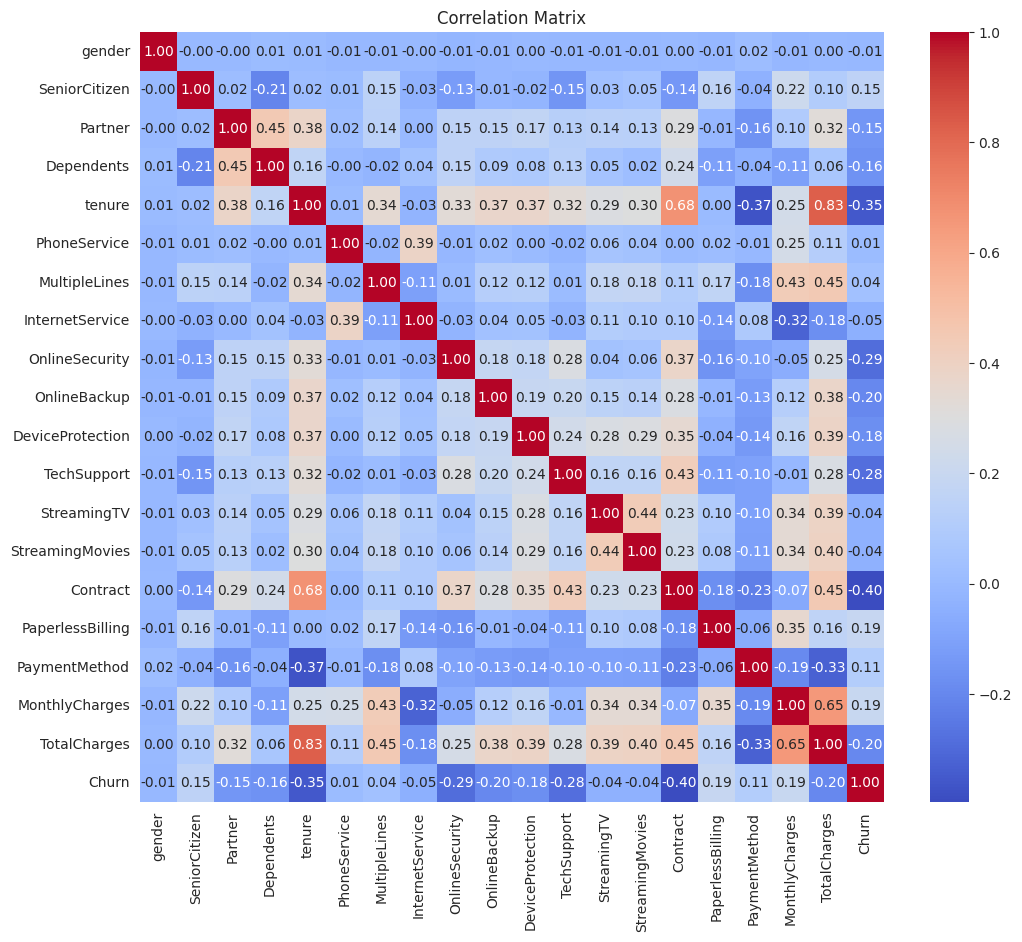

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# Heatmap للعلاقات بين المتغيرات بعد الترميز
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.select_dtypes(include=['int64', 'float64']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
